In [2]:
!pip install nltk
!pip install pandas

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Initialize VADER Sentiment Analyzer

In [3]:
sia = SentimentIntensityAnalyzer()

### Apply VADER to the hotel reviews

In [7]:
df = pd.read_csv('/content/dataset_cleaned.csv')

# Apply VADER to each review and get the compound sentiment score
df['vader_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(str(x)))
df['compound_score'] = df['vader_score'].apply(lambda x: x['compound'])

# Sentiment categorization based on VADER compound score
df['vader_category'] = df['compound_score'].apply(lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral')

In [9]:
# Assign vader scores in the original df
df.head()

,helpfulVotes,id,address,city,placeName,numberOfReviews,placeRating,webUrl,publishedDate,userRating,...,bpe_tokenization,bigram_tokenization,trigram_tokenization,whitespace_tokenization,rule_tokenization,spacy_tokenization,wordpiece_tokenization,vader_score,compound_score,vader_category
0,0.0,978474125.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-11-03,5.0,...,"['▁good', '▁service', '▁ayu', '▁friendly', '▁s...","[('good', 'service'), ('service', 'ayu'), ('ay...","[('good', 'service', 'ayu'), ('service', 'ayu'...","['good', 'service', 'ayu', 'friendly', 'staff'...","['good', 'service', 'ayu', 'friendly', 'staff'...","['good', 'service', 'ayu', 'friendly', 'staff'...","['good', 'service', 'a', '##yu', 'friendly', '...","{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp...",0.9868,Positive
1,0.0,978053018.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-30,1.0,...,"['▁change', '▁r', '▁lady', '▁manager', '▁r', '...","[('change', 'r'), ('r', 'lady'), ('lady', 'man...","[('change', 'r', 'lady'), ('r', 'lady', 'manag...","['change', 'r', 'lady', 'manager', 'r', 'hotel...","['change', 'r', 'lady', 'manager', 'r', 'hotel...","['change', 'r', 'lady', 'manager', 'r', 'hotel...","['change', 'r', 'lady', 'manager', 'r', 'hotel...","{'neg': 0.184, 'neu': 0.736, 'pos': 0.08, 'com...",-0.4019,Negative
2,0.0,976992067.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-28,5.0,...,"['▁perfect', '▁liked', '▁everything', '▁staff'...","[('perfect', 'liked'), ('liked', 'everything')...","[('perfect', 'liked', 'everything'), ('liked',...","['perfect', 'liked', 'everything', 'staff', 'k...","['perfect', 'liked', 'everything', 'staff', 'k...","['perfect', 'liked', 'everything', 'staff', 'k...","['perfect', 'liked', 'everything', 'staff', 'k...","{'neg': 0.079, 'neu': 0.334, 'pos': 0.587, 'co...",0.9796,Positive
3,0.0,976690540.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-26,5.0,...,"['▁stay', '▁unforgettable', '▁hotel', '▁beauti...","[('stay', 'unforgettable'), ('unforgettable', ...","[('stay', 'unforgettable', 'hotel'), ('unforge...","['stay', 'unforgettable', 'hotel', 'beautiful'...","['stay', 'unforgettable', 'hotel', 'beautiful'...","['stay', 'unforgettable', 'hotel', 'beautiful'...","['stay', 'un', '##for', '##get', '##table', 'h...","{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",0.9468,Positive
4,0.0,976664122.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-26,5.0,...,"['▁amazing', '▁hotel', '▁well', '▁situated', '...","[('amazing', 'hotel'), ('hotel', 'well'), ('we...","[('amazing', 'hotel', 'well'), ('hotel', 'well...","['amazing', 'hotel', 'well', 'situated', 'colo...","['amazing', 'hotel', 'well', 'situated', 'colo...","['amazing', 'hotel', 'well', 'situated', 'colo...","['amazing', 'hotel', 'well', 'situated', 'colo...","{'neg': 0.024, 'neu': 0.522, 'pos': 0.455, 'co...",0.9961,Positive


### Capture the strength of sentiment

In [11]:
df['sentiment_intensity'] = df['compound_score'].apply(lambda x: abs(x))

### View the sentiment score and category for each review

In [13]:
# Show the review text, sentiment score, and sentiment category
print(df[['review_text', 'vader_score', 'vader_category']])

                                             review_text  \
0      good service ayu friendly staff samadhi accomm...   
1      change r lady manager r hotel morning shift us...   
2      perfect liked everything staff kind food good ...   
3      stay unforgettable hotel beautiful staff reall...   
4      amazing hotel well situated colombo directly h...   
...                                                  ...   
11804  refreshing break staff courteous warm property...   
11805  daughter stayed one night great location close...   
11806  stayed glendower hotel one night following jou...   
11807  fairy tale stay historic quaint bungalow conve...   
11808  lived uk six year genuinely transported englis...   

                                             vader_score vader_category  
0      {'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp...       Positive  
1      {'neg': 0.184, 'neu': 0.736, 'pos': 0.08, 'com...       Negative  
2      {'neg': 0.079, 'neu': 0.334, 'pos': 0.587, 'co... 

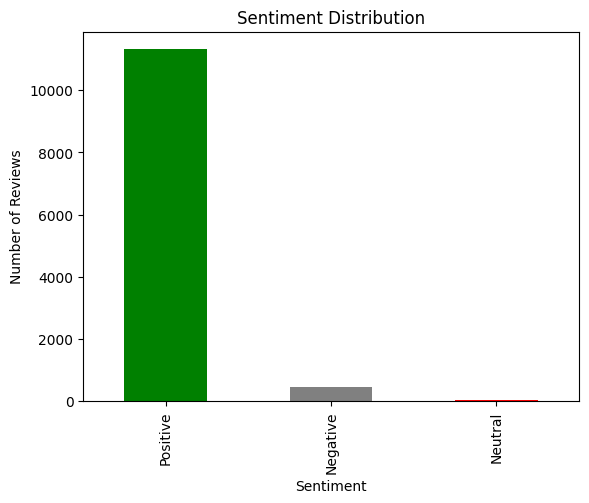

In [14]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
df['vader_category'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

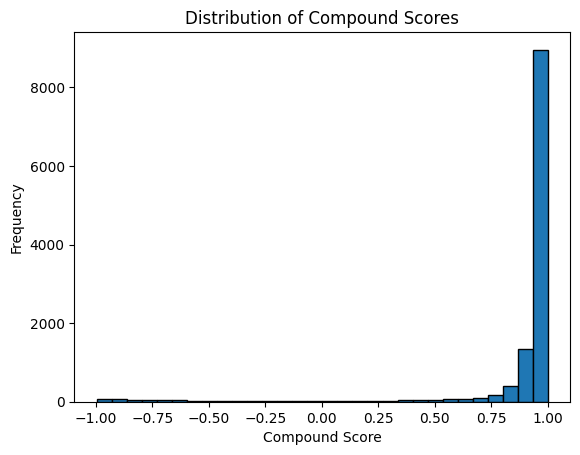

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['compound_score'], bins=30, edgecolor='black')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

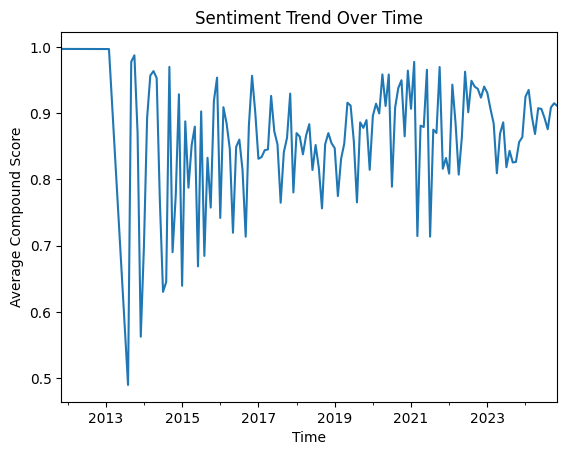

In [16]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
sentiment_trend = df.groupby(df['publishedDate'].dt.to_period('M'))['compound_score'].mean()

sentiment_trend.plot(kind='line')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Compound Score')
plt.show()